In [16]:
import os
import json
import shutil

import numpy as np
import cv2
import scipy.io as sio

# Move new images to poseX

In [18]:
old_path = "./datageneration/out/run0/"
new_path = "./poseX/val_ori"
filelist = os.listdir(old_path) 
num = 0
for file in filelist:
    if file.endswith(".png"):
        src = os.path.join(old_path, file)
        dst = os.path.join(new_path, file)
        shutil.move(src, dst)
        num += 1
print(num)

7443


# Convert to jpeg

In [20]:
path = 'poseX/val_ori/'
new_path = 'poseX/val/'
filelist = os.listdir(path) 
filelist = sorted(filelist)

for i, file in enumerate(filelist):
    if file.endswith(".png"):
        img = cv2.imread(os.path.join(path, file), cv2.IMREAD_COLOR)
        cv2.imwrite(os.path.join(new_path, '%012d.jpg' % i), img)

# Get annotations

In [21]:
import joblib

mat_path = './datageneration/out/run0/'
anns = dict()

for i, file in enumerate(filelist):
    m = sio.loadmat(os.path.join(mat_path, file.replace("image.png", "info.mat")))
    anns[file] = m

joblib.dump(anns, 'poseX/annotations.pkl')

['poseX/annotations.pkl']

In [ ]:
0, 2, 1, 4, 3, 
'nose', 'right_eye', 'left_eye', 'right_ear', 'left_ear', 'left_big_toe', 'left_small_toe', 'left_heel', 'right_big_toe', 'right_small_toe', 'right_heel' and the left, right hand finger tips

In [3]:
def to_coco_ann(joints):
    coco_ann = np.zeros([3, 17])
    #'Nose'
    coco_ann[:2, 0] = (joints[:, 15] - joints[:, 12]) * 1.1 + joints[:, 15]
    coco_ann[2, 0] = 1

    #'Left Eye', 'Right Eye'


    #'Left Ear', 'Right Ear',


    #'Left Shoulder', 'Right Shoulder'
    coco_ann[:2, 5] = joints[:, 17]
    coco_ann[:2, 6] = joints[:, 16]
    coco_ann[2, 5] = 1
    coco_ann[2, 6] = 1

    #'Left Elbow', 'Right Elbow',
    coco_ann[:2, 7] = joints[:, 19]
    coco_ann[:2, 8] = joints[:, 18]
    coco_ann[2, 7] = 1
    coco_ann[2, 8] = 1

    #'Left Wrist', 'Right Wrist'
    coco_ann[:2, 9] = joints[:, 21]
    coco_ann[:2,10] = joints[:, 20]
    coco_ann[2, 9] = 1
    coco_ann[2, 10] = 1

    #'Left Hip', 'Right Hip'


    #'Left Knee','Right Knee'
    coco_ann[:2, 13] = joints[:, 5]
    coco_ann[:2, 14] = joints[:, 4]
    coco_ann[2, 13] = 1
    coco_ann[2, 14] = 1

    #'Left Ankle', 'Right Ankle'
    coco_ann[:2, 15] = joints[:, 8]
    coco_ann[:2, 16] = joints[:, 7]
    coco_ann[2, 15] = 1
    coco_ann[2, 16] = 1

    return coco_ann

In [22]:
keypointsints

[346.0,
 123.8,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 311.0,
 142.0,
 1.0,
 340.0,
 142.0,
 1.0,
 309.0,
 176.0,
 1.0,
 344.0,
 176.0,
 1.0,
 323.0,
 207.0,
 1.0,
 342.0,
 207.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 304.0,
 256.0,
 1.0,
 333.0,
 259.0,
 1.0,
 294.0,
 308.0,
 1.0,
 328.0,
 314.0,
 1.0]

In [4]:
mat_path = './datageneration/out/run0/'
licenses = []
images = []
annotations = []
categories = []

for i, file in enumerate(filelist):
    m = sio.loadmat(os.path.join(mat_path, file.replace("image.png", "info.mat")))
    joints = m['joints2D']
    joints[1, :] = 400 - joints[1, :]
    keypoints = to_coco_ann(joints)
    keypoints = list(keypoints.T.flatten())
    num_keypoints = sum([1 if i > 0 else 0 for i in keypoints[2::3]])
    bbox = [np.min(joints[0,:]) - 20, np.min(joints[1,:]) - 30, 
       np.max(joints[0,:]) - np.min(joints[0,:]) + 35,
       np.max(joints[1,:]) - np.min(joints[1,:]) + 35,]
    area = 8511 / 25000 * bbox[2] * bbox[3]
    
    licenses.append({'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/',
                   'id': i,
                   'name': 'Attribution-NonCommercial-ShareAlike License'}
                   )
    
    image = {'license': i,
          'file_name': '%012d.jpg' % i,
          'coco_url': 'http://images.cocodataset.org/val2017/%012d.jpg' % i,
          'height': 400,
          'width': 600,
          'date_captured': '2013-11-14 17:02:52',
          'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
          'id': i
          }
    images.append(image)
    
    annotations.append({
        'keypoints': keypoints,
        'image_id': i,
        'category_id': 1,
        'id': i,
        'num_keypoints' : num_keypoints,
        'segmentation':[],
        'area':area,
         'iscrowd': 0,
        'bbox': bbox
    })
    
    categories.append({'supercategory': 'person',
          'id': 1,
          'name': 'person',
          'keypoints': ['nose',
           'left_eye',
           'right_eye',
           'left_ear',
           'right_ear',
           'left_shoulder',
           'right_shoulder',
           'left_elbow',
           'right_elbow',
           'left_wrist',
           'right_wrist',
           'left_hip',
           'right_hip',
           'left_knee',
           'right_knee',
           'left_ankle',
           'right_ankle'],
          'skeleton': [[16, 14],
           [14, 12],
           [17, 15],
           [15, 13],
           [12, 13],
           [6, 12],
           [7, 13],
           [6, 7],
           [6, 8],
           [7, 9],
           [8, 10],
           [9, 11],
           [2, 3],
           [1, 2],
           [1, 3],
           [2, 4],
           [3, 5],
           [4, 6],
           [5, 7]]})

In [5]:
with open("/root/datasets/coco/annotations/person_keypoints_val2017.json",'r') as load_f:
    load_dict = json.load(load_f)
    
my_dict = dict()
my_dict['info'] = load_dict['info']
my_dict['licenses'] = licenses
my_dict['images'] = images
my_dict['annotations'] = annotations
my_dict['categories'] = categories

In [6]:
with open('poseX/person_keypoints_validation.json', 'w') as f:
    b = json.dumps(my_dict)
    f.write(b)

# Check an image

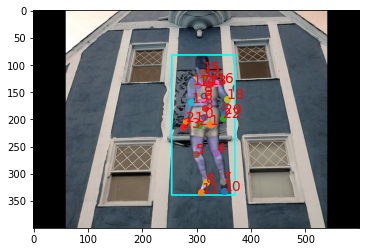

In [7]:
import matplotlib.pyplot as plt
file = filelist[2]
m = sio.loadmat(os.path.join(mat_path, file.replace("image.png", "info.mat")))
joints = m['joints2D']
joints[1, :] = 400 - joints[1, :]

i1 = cv2.imread(os.path.join(path, file))

bbox = [np.min(joints[0,:]) - 20, np.min(joints[1,:]) - 30, 
       np.max(joints[0,:]) - np.min(joints[0,:]) + 35,
       np.max(joints[1,:]) - np.min(joints[1,:]) + 35,]
x, y, w, h = bbox
image = cv2.rectangle(i1, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 255), 2)
plt.imshow(image)

for j in range(24):
    x, y = joints[0, j], joints[1, j]
    plt.scatter(x, y)
    plt.text(x, y, j, fontsize=14, color='red')
    
plt.xlim()
plt.show()

# Test

In [8]:
from pycocotools.coco import COCO

In [9]:
coco = COCO("poseX/person_keypoints_validation.json")

loading annotations into memory...
Done (t=0.98s)
creating index...
index created!


In [10]:
catIds = coco.getCatIds(catNms=['person'])
# getImgIds(imgIds=[], catIds=[])
# 通过图片的id或是所属种类的id得到图片的id
imgIds = coco.getImgIds(catIds=catIds)

In [11]:
img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]

In [12]:
coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])

[{'license': 4025,
  'file_name': '000000004025.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000004025.jpg',
  'height': 400,
  'width': 600,
  'date_captured': '2013-11-14 17:02:52',
  'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
  'id': 4025}]

In [13]:
coco.loadAnns([0])

[{'keypoints': [300.6,
   85.1,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   282.0,
   124.0,
   1.0,
   334.0,
   119.0,
   1.0,
   276.0,
   169.0,
   1.0,
   330.0,
   145.0,
   1.0,
   259.0,
   211.0,
   1.0,
   314.0,
   108.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   288.0,
   279.0,
   1.0,
   327.0,
   276.0,
   1.0,
   301.0,
   350.0,
   1.0,
   333.0,
   347.0,
   1.0],
  'image_id': 0,
  'category_id': 1,
  'id': 0,
  'num_keypoints': 11,
  'segmentation': [],
  'area': 11971.23216,
  'iscrowd': 0,
  'bbox': [231.0, 64.0, 118.0, 298.0]}]